# <font color='a2d2ff'> 3. Data PreProcessing, Feature Management, and Modelling #

## Data PreProcessing

This notebook focuses in the process of data cleaning, transforming and organizing the dataset to ready it for the machine learning models.

**Step 1**: Import all the needed libraries.

In [1846]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')

#scaling methods
# minmax
# standard
# robust
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV, RFE
from imblearn.ensemble import BalancedRandomForestClassifier

# embedded methods
from sklearn.linear_model import LassoCV

# metric
from sklearn.metrics import classification_report

from sklearn.model_selection import RepeatedStratifiedKFold

**Step 2**: Load the *learn.csv* dataset. 
A brief analysis of the dataset reveals that it already includes an `id` column, so this column will be used as the `learn` DataFrame index.

In [1847]:
learn = pd.read_csv("Nata_Files/learn.csv", index_col = 0)
learn.head()

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,notes_baker,origin,oven_temperature,pastry_type,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,,,
1,54.0,24.0,26.0,100.4,52.0,11.0,309.0,3.2,NaN,Lisboa,NaN,Pastel Nata,207.0,42.74,22.8,5.7,KO
2,66.0,37.0,34.0,98.0,46.0,10.0,317.0,3.3,NaN,Lisboa,306.0,NaN,245.0,41.73,11.6,4.0,KO
3,41.0,30.0,19.0,99.3,53.0,10.0,130.0,3.4,NaN,Porto,121.0,NaN,186.0,75.10,20.3,7.5,OK
4,62.0,24.0,48.0,98.0,115.0,9.0,354.0,3.3,NaN,Lisboa,357.0,Pastel de Nata,186.0,46.41,73.3,4.2,OK
5,55.0,21.0,34.0,100.1,48.0,9.0,211.0,3.0,NaN,Lisboa,202.0,Pastel de nata,218.0,56.52,80.1,6.0,KO


**Step 3**: Examine the dataset with the `info()` method.

In [1848]:
learn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5200 entries, 1 to 5200
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ambient_humidity   5182 non-null   float64
 1   baking_duration    5199 non-null   float64
 2   cooling_period     5199 non-null   float64
 3   cream_fat_content  5176 non-null   float64
 4   egg_temperature    5176 non-null   float64
 5   egg_yolk_count     5176 non-null   float64
 6   final_temperature  5175 non-null   float64
 7   lemon_zest_ph      5174 non-null   float64
 8   notes_baker        0 non-null      float64
 9   origin             5039 non-null   object 
 10  oven_temperature   5179 non-null   float64
 11  pastry_type        3411 non-null   object 
 12  preheating_time    5181 non-null   float64
 13  salt_ratio         5187 non-null   float64
 14  sugar_content      5178 non-null   float64
 15  vanilla_extract    5182 non-null   float64
 16  quality_class      5199 non-n

**Step 4**: Generate the dataset's statistical summary for the numerical features using the `describe()` method.

In [1849]:
learn.describe()


,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,notes_baker,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract
count,5182.000000,5199.000000,5199.000000,5176.00000,5176.000000,5176.000000,5175.000000,5174.000000,0.0,5179.000000,5181.000000,5187.000000,5178.000000,5182.000000
mean,59.980316,26.979804,31.817850,98.41306,70.812403,10.498068,223.577198,3.218902,NaN,223.541031,216.413241,55.882034,54.003418,5.307159
std,11.616151,8.320079,14.427143,1.99735,35.439831,1.257709,85.258779,0.165909,NaN,84.482034,39.533116,34.867144,47.213038,1.483175
min,40.000000,14.000000,0.000000,91.90000,12.000000,8.000000,31.000000,2.700000,NaN,58.000000,114.000000,11.550000,6.000000,2.200000
25%,50.000000,21.000000,25.000000,97.10000,44.000000,10.000000,164.000000,3.100000,NaN,166.000000,192.000000,37.910000,18.000000,4.300000
50%,60.000000,25.000000,31.000000,98.40000,67.000000,10.000000,226.000000,3.200000,NaN,227.000000,209.000000,47.170000,30.000000,5.100000
75%,70.000000,30.000000,39.000000,99.80000,92.000000,11.000000,284.000000,3.300000,NaN,283.000000,231.000000,64.610000,80.675000,6.000000
max,80.000000,89.000000,105.000000,107.30000,575.000000,15.000000,722.000000,4.000000,NaN,713.000000,499.000000,640.320000,656.500000,20.800000


**Step 5**: Check class proportions of the target variable `quality_class`. By setting the parameter `normalize = True`, the result given will be the proportions of each class on the dataset, instead of the absolute counts (which is the default result of the method `value_counts`).

In [1850]:
learn['quality_class'].value_counts(normalize=True)

quality_class
OK    0.635122
KO    0.364878
Name: proportion, dtype: float64

**Step 6**: Remove the duplicate entries, previously identified in Notebook 1.

In [1851]:
print(f"There are {learn.duplicated().sum()} duplicate entries.")
learn.drop_duplicates(inplace=True)
print(f"After removing all duplicates, there are now {learn.duplicated().sum()} duplicates in the dataset.")

There are 2 duplicate entries.
After removing all duplicates, there are now 0 duplicates in the dataset.


**NOTE**: It is crucial to note that, since 2 rows were removed, our dataset is now composed of **5198 rows and 17 columns**. This can be checked using the `shape` attribute.

In [1852]:
print(f"shape: {learn.shape}")

shape: (5198, 17)


**Step 7**: Check the dataset for missing values.

In [1853]:
missing_counts = learn.isna().sum()
missing = missing_counts[missing_counts > 0].sort_values(ascending=False)
if missing.empty:
    print("No missing values detected.")
else:
    print("Missing values detected:")
    display(missing)

Missing values detected:


notes_baker          5198
pastry_type          1788
origin                161
lemon_zest_ph          26
final_temperature      25
cream_fat_content      24
egg_temperature        24
egg_yolk_count         24
sugar_content          22
oven_temperature       20
preheating_time        19
vanilla_extract        18
ambient_humidity       18
salt_ratio             13
baking_duration         1
cooling_period          1
quality_class           1
dtype: int64

**Step 8**: Drop any empty (full of missing values) or irrelevant column. This works as a Filter Method in Feature Selection, since we are removing features before any model is trained. This method consists of analysing statistical and information properties of the columns, namely evaluate its variance or if the variable provides any meaninful information.

- The column `notes_baker` is composed of missing values, meaning that it does not retain any relevant information for the model.
- The column `pastry_type` includes data inconsistencies ("pastel nata" and "pastel de nata" - which both refer to the same pastry "Pastel de Nata"). Even if this column were to be cleaned, it would not add meaningful information since our project focuses solely in Pastéis de Nata meaning the pastry type is only "Pastel de Nata". This is equivalent to removing a feature with zero variance (constant).

In [1854]:
for col in ["notes_baker", "pastry_type"]:
    if col in learn.columns:
        learn = learn.drop(columns=[col])
        print(f"Removed column: {col}")
    else:
        print(f"Column '{col}' already erased.")

Removed column: notes_baker
Removed column: pastry_type


**NOTE**: It is crucial to note that, since 2 columns were removed, our dataset is now composed of **5198 rows and 15 columns**. This can be checked using the `shape` attribute.

In [1855]:
print(f"shape: {learn.shape}")

shape: (5198, 15)


**Step 9**: Remove the row with the missing value in the target column `quality_class`. This row cannot be used for training since there is no label associated with that observation.

In [1856]:
learn = learn.dropna(axis = 0, subset = ['quality_class'])


**NOTE**: It is crucial to note that, since 1 row was removed, our dataset is now composed of **5197 rows and 15 columns**. This can be checked using the `shape` attribute.

In [1857]:
print(f"shape: {learn.shape}")

shape: (5197, 15)


**Step 10**: Using the Hold-Out method, partition the dataset into **train+validation** (`X_train_val` and `y_train_val`) and **test** (`X_test` and `y_test`). Our dataset size will then be **85% for train+val** and **15% for test**. This is done in the preprocessing stage to **avoid data leakage** (so the test set does not provide any information in the training process when imputing missing values).

In [1858]:
X = learn.drop('quality_class', axis=1)
y = learn['quality_class']

In [1859]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=1, stratify = y)

In [1860]:
print(f"X_train_val has {len(X_train_val)} observations and X_test has {len(X_test)} obvervations.")

X_train_val has 4417 observations and X_test has 780 obvervations.


**Step 11**: Inpute the numerical columns' missing values. 

As revealed in Notebook 1, nearly half of the features of the dataset are **positively skewed**, meaning the right tail is longer than the left tail. For those cases, the median is more representative of the data than the mean, since it is less sensitive to outliers than the latter. Therefore, for **highly skewed** features (**|skewness| >= 1**) the missing values will be imputed with the value of the **median** for the respective columns. For the cases where the distributions are nearly **symmetrical** (**|skewness| < 1**), the missing values will be imputed with the **mean** value.

In [1861]:
#num_cols = X.select_dtypes(include=["number"]).columns

#for col in num_cols:
    #non_na = X_train_val[col].dropna()

    #if non_na.empty:
        #continue
    #skew_val = non_na.skew()

    #if abs(skew_val) >= 1:
        #fill_value = non_na.median()
        #method = "median"
    #else:
        #fill_value = non_na.mean()
        #method = "mean"
        
    #X_train_val[col].fillna(fill_value, inplace=True)
    #X_test[col].fillna(fill_value, inplace=True)

    #print(f"Filled '{col}' using {method}={round(fill_value, 3)} (skewness={skew_val:.2})")

**Step _**: Normalize the categorical variable `origin`. Strip of any unnecessary white spaces and convert to lower case.

In [1862]:
X_train_val['origin'] = X_train_val['origin'].str.strip().str.lower()
X_test['origin'] = X_test['origin'].str.strip().str.lower()

**Step _:** Encode the variable `origin` so that it can be imputed.

In [1863]:
X_train_val['origin_encoded'] = X_train_val['origin'].map({'lisboa': 0, 'porto': 1})
X_test['origin_encoded'] = X_test['origin'].map({'lisboa': 0, 'porto': 1})
X_train_val = X_train_val.drop(columns = "origin", axis = 1)
X_test = X_test.drop(columns = "origin", axis = 1)

**Trying to impute the values with KNN.**

In [1864]:
knn_imputer = KNNImputer(n_neighbors=4, weights='distance')
X_train_val_imputed = knn_imputer.fit_transform(X_train_val)
X_test_imputed = knn_imputer.transform(X_test)
X_train_val = pd.DataFrame(X_train_val_imputed, columns = X_train_val.columns, index = X_train_val.index)
X_test = pd.DataFrame(X_test_imputed, columns= X_test.columns, index = X_test.index)

In [1865]:
print(X_test['origin_encoded'].unique())
X_train_val['origin_encoded'].unique()

[0.         1.         0.24607744]


array([0.        , 1.        , 0.25484663, 0.72951979, 0.76952321,
       0.47280763, 0.49922909, 0.8025619 ])

In [1866]:
X_train_val['origin_encoded'] = (X_train_val['origin_encoded'] >= 0.5).astype(int)
X_test['origin_encoded'] =  (X_test['origin_encoded'] >= 0.5).astype(int)
X_train_val['origin'] = X_train_val['origin_encoded'].map({0: 'Lisboa', 1: 'Porto'})
X_test['origin'] = X_test['origin_encoded'].map({0: 'Lisboa', 1: 'Porto'})
X_train_val = X_train_val.drop(columns='origin_encoded', axis = 1)
X_test = X_test.drop(columns='origin_encoded', axis=1)

In the feature selection this feature gets a score of 0 in Lasso, so we decided to drop it immediately instead of treating its 936 values outside of the threshold (Since it's a %, it can't be above 100)

In [1867]:
print(len(X_train_val[X_train_val["cream_fat_content"] > 100])) # cream_fat_content is a % so >100% is impossible
# y_train_val = y_train_val[X_train_val["cream_fat_content"] <= 100]
# X_train_val = X_train_val[X_train_val["cream_fat_content"] <= 100]
#X_train_val.drop('cream_fat_content', axis=1, inplace=True)
#X_test.drop('cream_fat_content', axis=1, inplace=True)

937


**Step _:** Clipping the `cream_fat_content` values.

In [1868]:
X_train_val['cream_fat_content'] = X_train_val['cream_fat_content'].clip(lower=0, upper=100)
X_test['cream_fat_content'] = X_test['cream_fat_content'].clip(lower=0, upper=100)

In [1869]:
X_train_val.shape

(4417, 14)

**Step 11**: Removing numerical columns' outliers using the IQR range method. This method considers outliers to be any observation above Q3 + 1.5IQR and below Q1 - 1.5IQR.

In [1870]:
total = pd.Series()
total_test = pd.Series()
num_cols = X_train_val.select_dtypes(include=["number"]).columns

k = 1.5
for col in num_cols:
    q1 = X_train_val[col].quantile(0.25)
    q3 = X_train_val[col].quantile(0.75)
    low_bound = q1 - k*(q3-q1)
    high_bound = q3 + k*(q3-q1)
    
    outliers = pd.concat([X_train_val[X_train_val[col]<low_bound][col], X_train_val[X_train_val[col]>high_bound][col]])
    total = pd.concat([total, pd.Series(outliers.index)])
    print(f'{col} has {outliers.count()} outliers, outside the bounds of ({low_bound: .4}, {high_bound: .4})')

    # repeat for the test dataset
    outliers_test = pd.concat([X_test[X_test[col]<low_bound][col], X_test[X_test[col]>high_bound][col]])
    total_test = pd.concat([total_test, pd.Series(outliers_test.index)])

print(f'There is a total of {len(total)} outliers, {len(total.unique())} unique rows with outliers, in the training dataset')

ambient_humidity has 0 outliers, outside the bounds of ( 20.0,  100.0)
baking_duration has 217 outliers, outside the bounds of ( 7.5,  43.5)
cooling_period has 338 outliers, outside the bounds of ( 4.0,  60.0)
cream_fat_content has 14 outliers, outside the bounds of ( 93.05,  103.8)
egg_temperature has 43 outliers, outside the bounds of (-28.0,  164.0)
egg_yolk_count has 378 outliers, outside the bounds of ( 8.5,  12.5)
final_temperature has 7 outliers, outside the bounds of (-13.5,  462.5)
lemon_zest_ph has 158 outliers, outside the bounds of ( 2.8,  3.6)
oven_temperature has 7 outliers, outside the bounds of (-5.5,  454.5)
preheating_time has 236 outliers, outside the bounds of ( 132.0,  292.0)
salt_ratio has 194 outliers, outside the bounds of (-1.765,  104.1)
sugar_content has 81 outliers, outside the bounds of (-75.3,  173.5)
vanilla_extract has 127 outliers, outside the bounds of ( 1.75,  8.55)
There is a total of 1800 outliers, 1364 unique rows with outliers, in the training dat

In [1871]:
limits = {
    "baking_duration" : (0,45),
    "cooling_period" : (0,80),
    "egg_temperature": (0,170),
    "egg_yolk_count": (0,15),
    "final_temperature": (20,450),
    "lemon_zest_ph": (2,4),
    "oven_temperature": (20,450),
    "preheating_time": (100,300),
    "salt_ratio": (0,120),
    "sugar_content": (0, 170),
    "vanilla_extract": (2.5,8.75)
          }

initial_rows = len(X_train_val)

for col, (lower, upper) in limits.items():
    y_train_val = y_train_val[(X_train_val[col] >= lower) & (X_train_val[col] <= upper)]
    X_train_val = X_train_val[(X_train_val[col] >= lower) & (X_train_val[col] <= upper)]

final_rows = len(X_train_val)
print(initial_rows, final_rows)
print(f"Removed {initial_rows - final_rows} rows ({100*(initial_rows - final_rows)/initial_rows:.2f}%).")

4417 3787
Removed 630 rows (14.26%).


Check skewness of all numerical features on the sets X_train_val and X_test

In [1872]:
skewness = X_train_val.select_dtypes(include=[np.number]).skew()
print("Skewness of all numerical columns:")
print(skewness.sort_values(ascending=False))
skewness1 = X_test.select_dtypes(include=[np.number]).skew()
print("Skewness of all numerical columns:")
print(skewness1.sort_values(ascending=False))

Skewness of all numerical columns:
salt_ratio           1.114166
baking_duration      1.016211
sugar_content        0.932196
preheating_time      0.553093
vanilla_extract      0.545079
egg_yolk_count       0.501368
egg_temperature      0.413734
lemon_zest_ph        0.302699
cooling_period       0.196537
ambient_humidity     0.027248
final_temperature   -0.119379
oven_temperature    -0.133827
cream_fat_content   -0.684526
dtype: float64
Skewness of all numerical columns:
salt_ratio           3.862807
sugar_content        2.731455
preheating_time      1.534781
baking_duration      1.374820
vanilla_extract      1.203901
egg_temperature      0.745169
egg_yolk_count       0.550608
lemon_zest_ph        0.303103
cooling_period       0.094490
oven_temperature     0.012622
final_temperature    0.005414
ambient_humidity    -0.036365
cream_fat_content   -0.736526
dtype: float64


This variables are highly-skewed so we decided to add a new column with it's logarithm.

In [1873]:
X_train_val['sugar_content_log'] = np.log(X_train_val['sugar_content'])
X_test['sugar_content_log'] = np.log(X_test['sugar_content'])
X_train_val['salt_ratio_log'] = np.log(X_train_val['salt_ratio'])
X_test['salt_ratio_log'] = np.log(X_test['salt_ratio'])
X_train_val['baking_duration_log'] = np.log(X_train_val['baking_duration'])
X_test['baking_duration_log'] = np.log(X_test['baking_duration'])
X_train_val['preheating_time_log'] = np.log(X_train_val['preheating_time'])
X_test['preheating_time_log'] = np.log(X_test['preheating_time'])
X_train_val['vanilla_extract_log'] = np.log(X_train_val['vanilla_extract'])
X_test['vanilla_extract_log'] = np.log(X_test['vanilla_extract'])

In [1874]:
skewness = X_train_val.select_dtypes(include=[np.number]).skew()
print("Skewness of all numerical columns:")
print(skewness.sort_values(ascending=False))
skewness1 = X_test.select_dtypes(include=[np.number]).skew()
print("Skewness of all numerical columns:")
print(skewness1.sort_values(ascending=False))

Skewness of all numerical columns:
salt_ratio             1.114166
baking_duration        1.016211
sugar_content          0.932196
preheating_time        0.553093
vanilla_extract        0.545079
egg_yolk_count         0.501368
baking_duration_log    0.491356
egg_temperature        0.413734
lemon_zest_ph          0.302699
cooling_period         0.196537
salt_ratio_log         0.147979
sugar_content_log      0.147485
preheating_time_log    0.116152
ambient_humidity       0.027248
vanilla_extract_log   -0.008680
final_temperature     -0.119379
oven_temperature      -0.133827
cream_fat_content     -0.684526
dtype: float64
Skewness of all numerical columns:
salt_ratio             3.862807
sugar_content          2.731455
preheating_time        1.534781
baking_duration        1.374820
vanilla_extract        1.203901
preheating_time_log    0.816981
egg_temperature        0.745169
baking_duration_log    0.703704
salt_ratio_log         0.693180
egg_yolk_count         0.550608
vanilla_extract_log

**Step 12**: Clean the categorical column `origin` and remove any missing values.

In [1875]:
print(X_train_val['origin'].unique(), X_test['origin'].unique())

['Lisboa' 'Porto'] ['Lisboa' 'Porto']


In [1876]:
X_train_val['origin'] = X_train_val['origin'].str.strip().str.title()
X_test['origin'] = X_test['origin'].str.strip().str.title()
print(X_train_val['origin'].unique(), X_test['origin'].unique())

['Lisboa' 'Porto'] ['Lisboa' 'Porto']


In [1877]:
i8min, i8max, i16min, i16max, i32min, i32max, i64min, i64max = np.iinfo(np.int8).min, np.iinfo(np.int8).max, np.iinfo(np.int16).min, np.iinfo(np.int16).max, np.iinfo(np.int32).min, np.iinfo(np.int32).max, np.iinfo(np.int64).min, np.iinfo(np.int64).max
print(f'int8:[{i8min}, {i8max}]')
print(f'int16:[{i16min}, {i16max}]')
print(f'int32:[{i32min}, {i32max}]')
print(f'int64:[{i64min}, {i64max}]\n')


f16min, f16max, f32min, f32max, f64min, f64max = np.finfo(np.float16).min, np.finfo(np.float16).max, np.finfo(np.float32).min, np.finfo(np.float32).max, np.finfo(np.float64).min, np.finfo(np.float64).max
#float8 doesn't exist
print(f'float16:[{f16min}, {f16max}]')
print(f'float32:[{f32min}, {f32max}]')
print(f'float64:[{f64min}, {f64max}]')

int8:[-128, 127]
int16:[-32768, 32767]
int32:[-2147483648, 2147483647]
int64:[-9223372036854775808, 9223372036854775807]

float16:[-65504.0, 65504.0]
float32:[-3.4028234663852886e+38, 3.4028234663852886e+38]
float64:[-1.7976931348623157e+308, 1.7976931348623157e+308]


In [1878]:
X_train_val.describe()

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,sugar_content_log,salt_ratio_log,baking_duration_log,preheating_time_log,vanilla_extract_log
count,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000
mean,59.939417,25.743597,31.279641,98.145289,71.740708,10.565135,230.605424,3.220726,230.530549,210.366438,49.350068,52.937127,5.114001,3.619972,3.835692,3.218161,5.339717,1.604826
std,11.596816,6.604278,12.731106,1.646730,31.892366,1.257482,78.979429,0.164054,78.135530,28.739053,18.350925,43.220689,1.200676,0.851819,0.352669,0.240609,0.134799,0.233369
min,40.000000,14.000000,0.000000,91.900000,12.000000,8.000000,41.000000,2.700000,58.000000,114.000000,11.550000,6.000000,2.500000,1.791759,2.446685,2.639057,4.736198,0.916291
25%,50.000000,21.000000,25.000000,97.000000,46.000000,10.000000,183.000000,3.100000,182.000000,191.000000,36.825000,17.800000,4.200000,2.879198,3.606177,3.044522,5.252273,1.435085
50%,60.000000,24.000000,31.000000,98.300000,69.000000,10.000000,231.000000,3.200000,232.000000,207.000000,45.230000,32.100000,5.000000,3.468856,3.811761,3.178054,5.332719,1.609438
75%,70.000000,29.000000,38.000000,99.800000,93.000000,11.000000,286.000000,3.300000,285.000000,227.000000,56.280000,80.900000,5.900000,4.393214,4.030339,3.367296,5.424950,1.774952
max,80.000000,45.000000,79.000000,100.000000,170.000000,15.000000,447.000000,3.900000,437.000000,300.000000,119.270000,169.100000,8.700000,5.130490,4.781390,3.806662,5.703782,2.163323


Changing datatypes to use less memory

In [1879]:
datatypes = {'ambient_humidity': 'int8', 'baking_duration': 'int8', 'cooling_period': 'int8', 
             'egg_temperature': 'int16', 'egg_yolk_count': 'int8', 'final_temperature': 'int16', 
             'lemon_zest_ph': 'float16', 'origin': 'category', 'oven_temperature': 'int16', 
             'preheating_time': 'int16', 'salt_ratio': 'float16', 'sugar_content': 'float16', 'vanilla_extract': 'float16'}
X_train_val = X_train_val.astype(datatypes)
X_test = X_test.astype(datatypes)
y_train_val = y_train_val.astype('category')
y_test = y_test.astype('category')

In [1880]:
print(X_train_val.info(), y_train_val.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3787 entries, 1522 to 4139
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ambient_humidity     3787 non-null   int8    
 1   baking_duration      3787 non-null   int8    
 2   cooling_period       3787 non-null   int8    
 3   cream_fat_content    3787 non-null   float64 
 4   egg_temperature      3787 non-null   int16   
 5   egg_yolk_count       3787 non-null   int8    
 6   final_temperature    3787 non-null   int16   
 7   lemon_zest_ph        3787 non-null   float16 
 8   oven_temperature     3787 non-null   int16   
 9   preheating_time      3787 non-null   int16   
 10  salt_ratio           3787 non-null   float16 
 11  sugar_content        3787 non-null   float16 
 12  vanilla_extract      3787 non-null   float16 
 13  origin               3787 non-null   category
 14  sugar_content_log    3787 non-null   float64 
 15  salt_ratio_log       37

In [1881]:
X_train_val.describe()

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,sugar_content_log,salt_ratio_log,baking_duration_log,preheating_time_log,vanilla_extract_log
count,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000
mean,59.937682,25.743597,31.279641,98.145289,71.738843,10.562715,230.602588,3.220703,230.528651,210.365461,inf,inf,5.109375,3.619972,3.835692,3.218161,5.339717,1.604826
std,11.596255,6.604278,12.731106,1.646730,31.892147,1.258028,78.978741,0.164185,78.135388,28.738783,18.343750,43.218750,1.200195,0.851819,0.352669,0.240609,0.134799,0.233369
min,40.000000,14.000000,0.000000,91.900000,12.000000,8.000000,41.000000,2.699219,58.000000,114.000000,11.546875,6.000000,2.500000,1.791759,2.446685,2.639057,4.736198,0.916291
25%,50.000000,21.000000,25.000000,97.000000,46.000000,10.000000,183.000000,3.099609,182.000000,191.000000,36.828125,17.796875,4.199219,2.879198,3.606177,3.044522,5.252273,1.435085
50%,60.000000,24.000000,31.000000,98.300000,69.000000,10.000000,231.000000,3.199219,232.000000,207.000000,45.218750,32.093750,5.000000,3.468856,3.811761,3.178054,5.332719,1.609438
75%,70.000000,29.000000,38.000000,99.800000,93.000000,11.000000,286.000000,3.300781,285.000000,227.000000,56.281250,80.875000,5.898438,4.393214,4.030339,3.367296,5.424950,1.774952
max,80.000000,45.000000,79.000000,100.000000,170.000000,15.000000,447.000000,3.900391,437.000000,300.000000,119.250000,169.125000,8.703125,5.130490,4.781390,3.806662,5.703782,2.163323


In [1882]:
len(X_train_val.columns)

19

In [1883]:
#numerical_features_list = X_train_val.columns
#fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15,30))

#for i in range(6):
    #numb_variable=numerical_features_list[i]
    #sns.histplot(data=X_train_val, x=numb_variable, ax=axes[i][0], color=sns.cubehelix_palette(start=.3, rot=-.5, n_colors=7)[i])
    #sns.cubehelix_palette(start=i*0.1, rot=-.5, as_cmap=True)
    #axes[i][0].set_xlabel(f'{numb_variable} histplot')

    #numb_variable=numerical_features_list[i]
    #sns.boxplot(data=X_train_val, x=numb_variable, y=y_train_val, ax=axes[i][1], color=sns.cubehelix_palette(start=.3, rot=-.5, n_colors=7)[i])
    #sns.cubehelix_palette(start=i*0.1, rot=-.5, as_cmap=True)
    #axes[i][1].set_xlabel(f'{numb_variable} boxplot')

    #numb_variable=numerical_features_list[i+6]
    #sns.histplot(data=X_train_val, x=numb_variable, ax=axes[i][2], color=sns.cubehelix_palette(start=.3, rot=-.1, n_colors=7)[i])
    #axes[i][2].set_xlabel(f'{numb_variable} histplot')

    #numb_variable=numerical_features_list[i+6]
    #sns.boxplot(data=X_train_val, x=numb_variable, y=y_train_val, ax=axes[i][3], color=sns.cubehelix_palette(start=.3, rot=-.1, n_colors=7)[i])
    #axes[i][3].set_xlabel(f'{numb_variable} boxplot')
#plt.tight_layout()

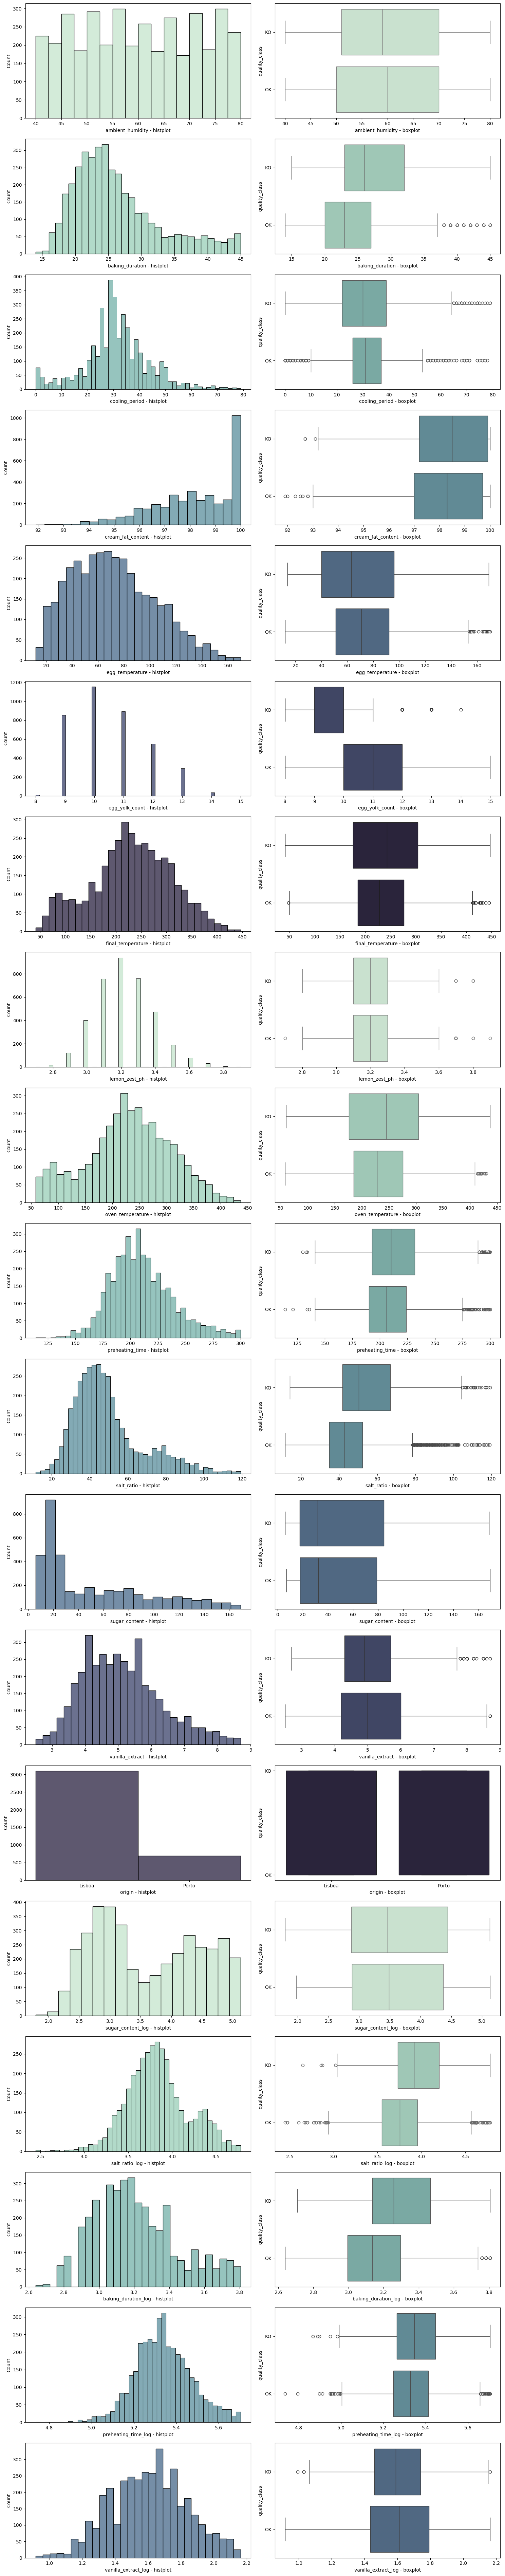

In [1884]:
numerical_features_list = X_train_val.columns

fig, axes = plt.subplots(
    nrows=len(numerical_features_list),
    ncols=2,
    figsize=(15, 4*len(numerical_features_list))
)

for i, feature in enumerate(numerical_features_list):

    # Histogram
    sns.histplot(
        data=X_train_val,
        x=feature,
        ax=axes[i][0],
        color=sns.cubehelix_palette(start=.3, rot=-.5, n_colors=7)[i % 7]
    )
    axes[i][0].set_xlabel(f'{feature} - histplot')

    # Boxplot
    sns.boxplot(
        data=X_train_val,
        x=feature,
        y=y_train_val,
        ax=axes[i][1],
        color=sns.cubehelix_palette(start=.3, rot=-.5, n_colors=7)[i % 7]
    )
    axes[i][1].set_xlabel(f'{feature} - boxplot')

plt.tight_layout()
plt.show()

In [1885]:
y_train_val

id
1522    KO
3184    KO
1101    OK
1446    KO
752     OK
        ..
539     OK
2586    KO
2986    OK
2856    OK
4139    OK
Name: quality_class, Length: 3787, dtype: category
Categories (2, object): ['KO', 'OK']

## 1. Preparation

This part of the project is the last step in preparing the data for modelling. Now that we have a clean dataset, this notebook's purpose is to ensure only relevant features are kept to train the model, ensuring it has the best performance possible, by dropping some of them.

**Step 2**: Import the partitioned and pre-processed datasets

In [1886]:
X_train_full = X_train_val.copy() 
X_test = X_test.copy()
y_train_full = y_train_val.copy()
y_test = y_test.copy()

## 2. Feature Selection

**Step 1**: Check the numerical variables' correlation

In [1887]:
def encode(train, test, zero, one):
    enc_train = train.replace(zero, 0).replace(one, 1)
    enc_test = test.replace(zero, 0).replace(one, 1)
    return enc_train, enc_test

In [1888]:
# join all the train data to check if any of the independent variables are correlated with the target
encoded_y_train, encoded_y_test = encode(y_train_full, y_test, 'KO', 'OK')

all_train_n = X_train_full.drop('origin', axis=1).join(encoded_y_train)
all_train_n.head()

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,sugar_content_log,salt_ratio_log,baking_duration_log,preheating_time_log,vanilla_extract_log,quality_class
id,,,,,,,,,,,,,,,,,,,
1522,69,40,23,98.2,22,11,141,3.500000,143,206,37.71875,11.203125,3.199219,2.415914,3.630190,3.688879,5.327876,1.163151,0
3184,50,28,33,97.0,30,10,237,3.199219,238,219,40.25000,15.398438,6.800781,2.734368,3.695110,3.332205,5.389072,1.916923,0
1101,80,45,11,96.7,22,10,86,3.199219,98,274,77.25000,27.593750,7.398438,3.317816,4.346917,3.806662,5.613128,2.001480,1
1446,80,23,35,96.3,36,10,262,3.099609,256,241,54.18750,10.703125,5.398438,2.370244,3.992681,3.135494,5.484797,1.686399,0
752,56,19,27,99.7,67,11,222,3.199219,218,202,38.90625,100.125000,4.500000,4.606170,3.661508,2.944439,5.308268,1.504077,1


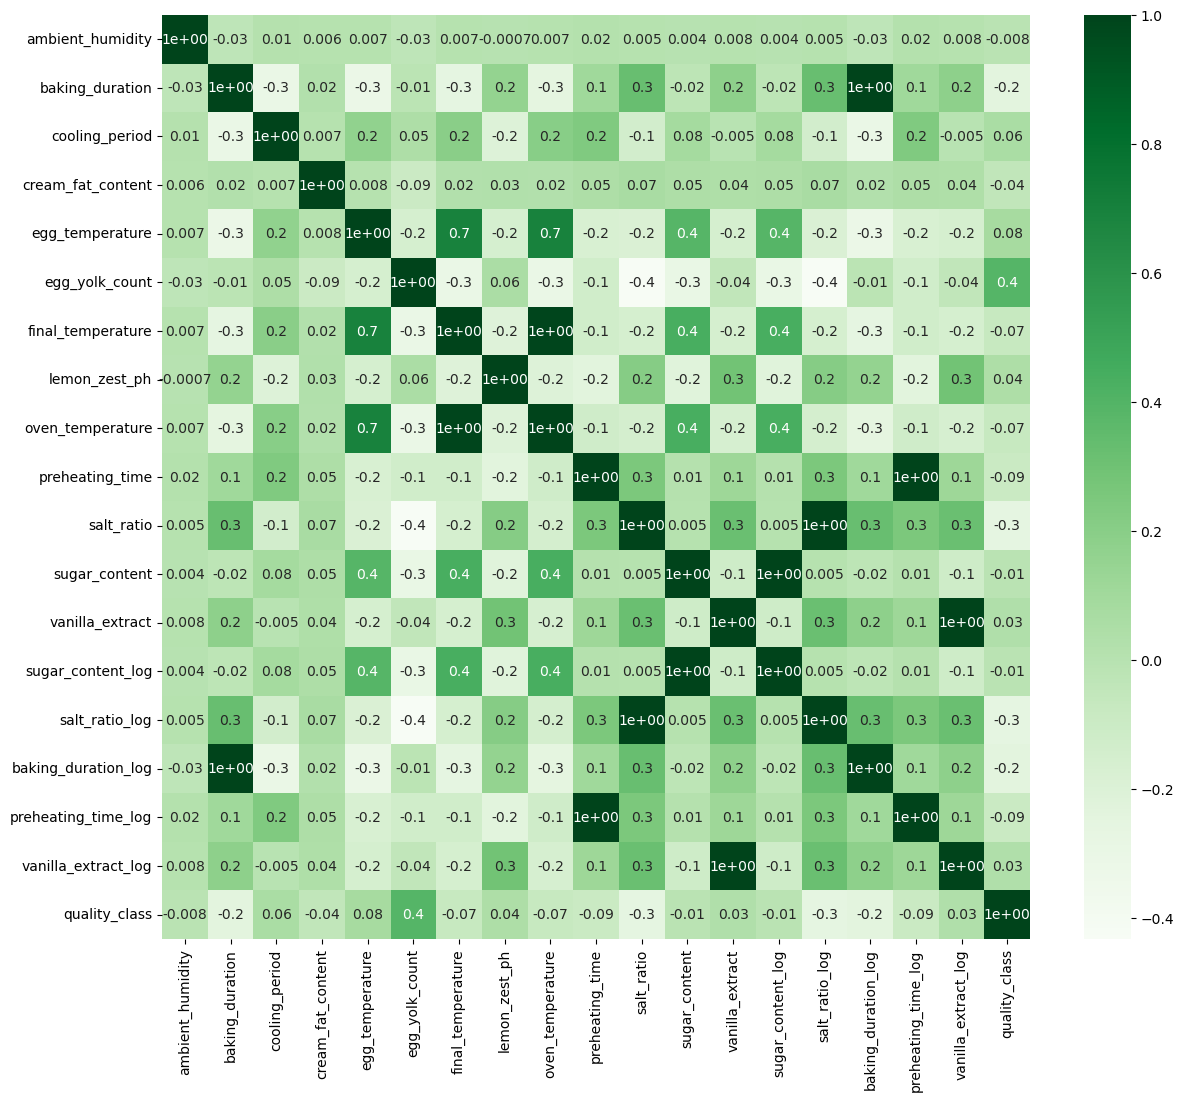

In [1889]:
plt.figure(figsize=(14,12))
sns.heatmap(data = all_train_n.corr('spearman'), annot = True, cmap = plt.cm.Greens, fmt='.1')
plt.show()

In [1890]:
table_spearman=[]
for var in X_train_full.drop('origin', axis=1):
    table_spearman.append('Discard')
table_spearman = pd.Series(table_spearman)

There is no independent variable highly correlated with the target. We need to use other feature selection techniques to get more insights.
There are three pairs of variables highly correlated, namely:
    - egg_temperature vs final_temperature (0.7)
    - egg_temperature vs oven_temperature (0.7)
    - final_temperature vs oven_temperature (almost 1)

We need to use other techniques of feature selection to decide which variables should we keep.

**Step 2**: Chi-squared to check the categorical variable's importance

In [1891]:
encoded_y_train

id
1522    0
3184    0
1101    1
1446    0
752     1
       ..
539     1
2586    0
2986    1
2856    1
4139    1
Name: quality_class, Length: 3787, dtype: category
Categories (2, int64): [0, 1]

In [1892]:
dfObserved = pd.crosstab(pd.Series(encoded_y_train.iloc[:]), X_train_full['origin'])
chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
if p<0.05:
    result="origin is IMPORTANT for Prediction"
else:
    result=f"origin is NOT an important predictor. (Discard {0} from model)"
print(result)

origin is IMPORTANT for Prediction


In [1893]:
table_chi = pd.Series(['Keep'])

This time we are going to apply Recursive Feature Elimination (RFE) that will allow to select the most important features to keep. The base estimator used will be a Logistic Regression.

In [1894]:
modellr = LogisticRegression()

Decide how many features we should select in the rfe. First we have to scale the data because this model is scale-sensitive

In [1895]:
def scale(scaler, train, test):
    removed = 0
    if 'origin' in train.columns:
        train, test = encode(train, test, 'porto', 'lisboa')

    if scaler=='RobustScaler':
        temp_scaler = RobustScaler().fit(train)
    elif scaler=='MinMaxScaler':
        temp_scaler = MinMaxScaler().fit(train)
    else:
        temp_scaler = StandardScaler().fit(train)

    # train data
    temp_train_scl = temp_scaler.transform(train) 
    temp_train_scl = pd.DataFrame(temp_train_scl, columns = train.columns).set_index(train.index)

    # Test data
    temp_test_scl = temp_scaler.transform(test) 
    temp_test_scl = pd.DataFrame(temp_test_scl, columns = test.columns).set_index(test.index)

    return temp_train_scl, temp_test_scl

In [1896]:
# Number of features
nof_list=np.arange(1,14)
high_score=0
# Variable to store the optimum features
nof=0           
score_list =[]

# scale the data 
X_train_full = X_train_full.drop(columns='origin')
X_test = X_test.drop(columns='origin')
temp_X_train_n_scl, temp_X_test_n_scl = scale('RobustScaler', X_train_full, X_test)

for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(temp_X_train_n_scl,y_train_full)
    X_val_rfe = rfe.transform(temp_X_test_n_scl)

    model.fit(X_train_rfe,y_train_full)
    
    score = model.score(X_val_rfe,y_test)
    score_list.append(score)
    #print(f"Score with {nof_list[n]} features: {score:.5f}")
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 8
Score with 8 features: 0.746154


In [1897]:
X_train_full

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,sugar_content_log,salt_ratio_log,baking_duration_log,preheating_time_log,vanilla_extract_log
id,,,,,,,,,,,,,,,,,,
1522,69,40,23,98.2,22,11,141,3.500000,143,206,37.71875,11.203125,3.199219,2.415914,3.630190,3.688879,5.327876,1.163151
3184,50,28,33,97.0,30,10,237,3.199219,238,219,40.25000,15.398438,6.800781,2.734368,3.695110,3.332205,5.389072,1.916923
1101,80,45,11,96.7,22,10,86,3.199219,98,274,77.25000,27.593750,7.398438,3.317816,4.346917,3.806662,5.613128,2.001480
1446,80,23,35,96.3,36,10,262,3.099609,256,241,54.18750,10.703125,5.398438,2.370244,3.992681,3.135494,5.484797,1.686399
752,56,19,27,99.7,67,11,222,3.199219,218,202,38.90625,100.125000,4.500000,4.606170,3.661508,2.944439,5.308268,1.504077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,65,38,8,99.1,39,10,85,3.300781,90,223,88.31250,26.093750,5.800781,3.261935,4.480740,3.637586,5.407172,1.757858
2586,51,27,14,100.0,80,9,413,3.099609,391,218,42.31250,111.687500,5.101562,4.715817,3.744787,3.295837,5.384495,1.629241
2986,43,30,29,100.0,22,12,91,3.300781,109,200,81.31250,20.500000,4.601562,3.020425,4.398392,3.401197,5.298317,1.526056


Create an rfe instance and initialize it with the amount of features suggested by the function above

In [1898]:
rfelr = RFE(estimator=modellr, n_features_to_select=nof)

In [1899]:
rfelr.fit_transform(temp_X_train_n_scl, y_train_full)

array([[ 2.        ,  1.        , -0.87378641, ..., -0.69546338,
         1.5826138 , -0.02804448],
       [ 0.5       ,  0.        ,  0.05825243, ..., -0.4851262 ,
         0.47758174,  0.3263496 ],
       [ 2.625     ,  0.        , -1.40776699, ..., -0.09976138,
         1.94752317,  1.62389884],
       ...,
       [ 0.75      ,  2.        , -1.3592233 , ..., -0.29618665,
         0.69133193, -0.19922461],
       [ 0.        ,  1.        , -0.50485437, ..., -0.5069267 ,
         0.        , -1.00571534],
       [-1.        ,  0.        , -0.18446602, ...,  0.33616219,
        -1.25619124,  0.16547334]], shape=(3787, 8))

Check the variables that were selected by RFE as the most "important" ones by calling the attribute `support_` to `rfe`.

In [1900]:
print(temp_X_train_n_scl.columns)
print(rfelr.support_)
rfelr.ranking_

Index(['ambient_humidity', 'baking_duration', 'cooling_period',
       'cream_fat_content', 'egg_temperature', 'egg_yolk_count',
       'final_temperature', 'lemon_zest_ph', 'oven_temperature',
       'preheating_time', 'salt_ratio', 'sugar_content', 'vanilla_extract',
       'sugar_content_log', 'salt_ratio_log', 'baking_duration_log',
       'preheating_time_log', 'vanilla_extract_log'],
      dtype='object')
[False  True False False False  True  True False False  True False False
  True  True False  True  True False]


array([11,  1,  5, 10,  2,  1,  1,  3,  7,  1,  6,  9,  1,  1,  4,  1,  1,
        8])

In [1901]:
selected_features = pd.Series(rfelr.support_, index = temp_X_train_n_scl.columns)
print("Features to keep:\n", selected_features)

Features to keep:
 ambient_humidity       False
baking_duration         True
cooling_period         False
cream_fat_content      False
egg_temperature        False
egg_yolk_count          True
final_temperature       True
lemon_zest_ph          False
oven_temperature       False
preheating_time         True
salt_ratio             False
sugar_content          False
vanilla_extract         True
sugar_content_log       True
salt_ratio_log         False
baking_duration_log     True
preheating_time_log     True
vanilla_extract_log    False
dtype: bool


In [1902]:
table_rfe=[]
for var in rfelr.support_:
    if var:
        table_rfe.append('Keep')
    else:
        table_rfe.append('Discard')
table_rfe = pd.Series(table_rfe)

Because rfe is a wrapper method, the estimation depends on the supervised model that was used. The recommendation that we obtained may not be the same for other classifiers.

RFECV (RFE with Cross Validation) doesn't take as a parameter the number of selected features. The number of features selected is tuned automatically by fitting an RFE selector

In [1903]:
rfecvlr = RFECV(estimator=modellr)
rfecvlr.fit_transform(temp_X_train_n_scl, y_train_full)
pd.Series(rfecvlr.support_, index = temp_X_train_n_scl.columns) 

ambient_humidity       False
baking_duration         True
cooling_period         False
cream_fat_content      False
egg_temperature         True
egg_yolk_count          True
final_temperature       True
lemon_zest_ph          False
oven_temperature       False
preheating_time         True
salt_ratio             False
sugar_content          False
vanilla_extract         True
sugar_content_log       True
salt_ratio_log         False
baking_duration_log     True
preheating_time_log     True
vanilla_extract_log    False
dtype: bool

In [1904]:
table_rfecv=[]
for var in rfecvlr.support_:
    if var:
        table_rfecv.append('Keep')
    else:
        table_rfecv.append('Discard')
table_rfecv = pd.Series(table_rfecv)

Using LassoCV, create a Lasso Regression instance called `reg` and fit the data to it. We are using the scaled dataset again, because Lasso is also scale-sensitive.

In [1905]:
reg = LassoCV()

In [1906]:
reg.fit(temp_X_train_n_scl, encoded_y_train)

LassoCV()

Create a pandas Series named `coef` that will have as index the `data` columns names and the `coef_` attribute as value.

In [1907]:
coef = pd.Series(reg.coef_, index = temp_X_train_n_scl.columns)

Check how many variables did Lasso pick (if the coef is different from 0) and how many variables did Lasso eliminated (if the coef is equal to 0).

In [1908]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
coef.abs().sort_values()

Lasso picked 10 variables and eliminated the other 8 variables


ambient_humidity       0.000000
sugar_content          0.000000
salt_ratio             0.000000
preheating_time        0.000000
oven_temperature       0.000000
cream_fat_content      0.000000
baking_duration        0.000000
vanilla_extract_log    0.000000
preheating_time_log    0.007056
salt_ratio_log         0.024733
lemon_zest_ph          0.027269
cooling_period         0.027355
egg_temperature        0.068317
vanilla_extract        0.069660
final_temperature      0.079072
sugar_content_log      0.096666
egg_yolk_count         0.144353
baking_duration_log    0.172458
dtype: float64

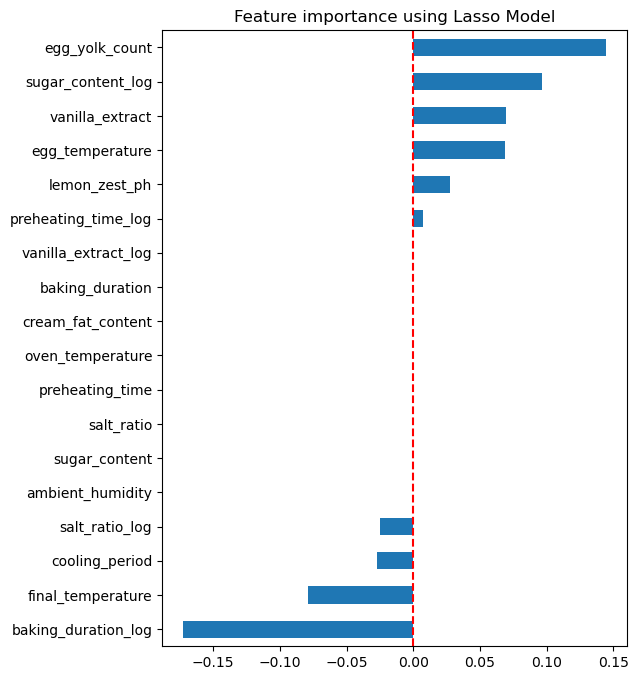

In [1909]:
imp_coef = coef.sort_values()
plt.figure(figsize=(6,8))
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

In [1910]:
table_lasso=[]
#coef = coef.abs().drop('origin')
for var in coef:
    if var>0.03:
        table_lasso.append('Keep')
    else:
        table_lasso.append('Discard')
table_lasso = pd.Series(table_lasso)

In [1911]:
n_selection = pd.DataFrame()
n_selection['Spearman'] = table_spearman
n_selection['RFE'] = table_rfe
n_selection['RFECV'] = table_rfecv
n_selection['Lasso'] = table_lasso

In [1912]:
result = []
for var in n_selection.index:
    if n_selection.T[var].value_counts()['Discard']==4 or coef[var]==0.0:
        result.append('Remove from the dataset')
    elif n_selection.T[var].value_counts()['Keep']>=3:
        result.append('Include in the dataset')
    else:
        result.append('Try with and without')
n_selection['What to do?'] = pd.Series(result)
#n_selection.index = X_train_full.drop('origin', axis=1).columns

In [1913]:
n_selection = pd.merge(pd.DataFrame(n_selection.reset_index().astype(str)), pd.DataFrame(abs(coef).reset_index().astype(str)), 'left', on='index') 
n_selection.columns=['index', 'Spearman', 'RFE', 'RFECV', 'Lasso', 'What to do?', 'abs coef score'] 
n_selection['index'] = X_train_full.columns
n_selection.set_index('index', inplace=True)

In [1914]:
c_selection = pd.DataFrame(table_chi)
c_selection.set_index(pd.Series(['origin']), inplace=True)
c_selection.columns=['Chi-Squared']

In [1915]:
print('Numerical Data')
n_selection

Numerical Data


,Spearman,RFE,RFECV,Lasso,What to do?,abs coef score
index,,,,,,
ambient_humidity,Discard,Discard,Discard,Discard,Remove from the dataset,NaN
baking_duration,Discard,Keep,Keep,Discard,Remove from the dataset,NaN
cooling_period,Discard,Discard,Discard,Discard,Remove from the dataset,NaN
cream_fat_content,Discard,Discard,Discard,Discard,Remove from the dataset,NaN
egg_temperature,Discard,Discard,Keep,Keep,Try with and without,NaN
egg_yolk_count,Discard,Keep,Keep,Keep,Include in the dataset,NaN
final_temperature,Discard,Keep,Keep,Discard,Try with and without,NaN
lemon_zest_ph,Discard,Discard,Discard,Discard,Remove from the dataset,NaN
oven_temperature,Discard,Discard,Discard,Discard,Remove from the dataset,NaN


In [1916]:
print('\nCategorical Data')
c_selection


Categorical Data


,Chi-Squared
origin,Keep


Comparing models

In order to get the best performance, compare models with different feature selections

In [1917]:
# encoding the categorical column 
X_train_enc = X_train_full.copy()
X_test_enc = X_test.copy()
X_train_enc, X_test_enc = encode(X_train_enc, X_test_enc, 'porto', 'lisboa')

In [1918]:
lst_features_to_remove = list(n_selection[n_selection['What to do?']=='Remove from the dataset'].index)
lst_more_features_to_remove = list(n_selection[n_selection['What to do?']=='Try with and without'].sort_values(by='abs coef score').index)
X_train_fs = X_train_enc.copy()
X_test_fs = X_test_enc.copy()

In [1919]:
print(f'Remove: {lst_features_to_remove}\nMaybe: {lst_more_features_to_remove}')

Remove: ['ambient_humidity', 'baking_duration', 'cooling_period', 'cream_fat_content', 'lemon_zest_ph', 'oven_temperature', 'preheating_time', 'salt_ratio', 'sugar_content', 'salt_ratio_log', 'vanilla_extract_log']
Maybe: ['egg_temperature', 'final_temperature', 'baking_duration_log', 'preheating_time_log']


Create four pairs of models to compare their performances (LogisticRegression, RandomForestClassifier, BalancedRandomForestClassifier, DecisionTreeClassifier), and fit half of them to the training data with the first feature selection, and the other to the second selection

In [1920]:
modellr = LogisticRegression()
modelrfc = RandomForestClassifier(class_weight='balanced')
modelbrfc = BalancedRandomForestClassifier()

In [1921]:
models = [modellr, modelrfc, modelbrfc]

Model evaluation with Repeated Stratified K Fold 

In [1922]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
def kfold(model, xtrain, ytrain):
    scores = []
    for train_idx, val_idx in rskf.split(xtrain, ytrain):
        X_train, X_val = xtrain.iloc[train_idx], xtrain.iloc[val_idx]
        y_train, y_val = ytrain.iloc[train_idx], ytrain.iloc[val_idx]

        # scale the data
        X_train, X_val = scale('RobustScaler', X_train, X_val)

        # Train and validate the model
        model.fit(X_train, y_train)
        scores.append(model.score(X_val, y_val))
    return pd.Series(scores).mean()

In [1923]:
for model in models:
    print(f'\nModel {model}')
    score = kfold(model, X_train_fs, encoded_y_train)
    print('mean score', score)


Model LogisticRegression()
mean score 0.7485252274578282

Model RandomForestClassifier(class_weight='balanced')
mean score 0.7809163143408516

Model BalancedRandomForestClassifier()
mean score 0.7746683257639921


The model with the best performance is the Random Forest Classifier, so we're going to keep improving that one

In [1924]:
scores = []

print('Model performance with all the features (including the "Remove" list)')
score = kfold(modelrfc, X_train_fs, encoded_y_train)
print('mean score', score)

# remove the features with 'Remove' and try features to try with and without
for var in range(len(lst_more_features_to_remove)+1):
    cols_removed_to_try = lst_more_features_to_remove[:var]
    


    score = kfold(modelrfc, X_train_fs.drop(lst_features_to_remove, axis=1).drop(cols_removed_to_try, axis=1), encoded_y_train)
    

    # print(f'\nNumber of maybe features removed: {var}')
    # print('mean score', score)
    scores.append([cols_removed_to_try, score])

scores_df = pd.DataFrame(scores, columns=['columns removed', 'scores'])
scores_df['number maybe removed features'] = scores_df['columns removed'].apply(len)
scores_df = scores_df[['number maybe removed features', 'columns removed', 'scores']]

Model performance with all the features (including the "Remove" list)
mean score 0.7808287121431284


In [1925]:
#pd.Series(scores).sort_values(ascending=False)
scores_df = scores_df.sort_values(by='scores', ascending=False)
scores_df

,number maybe removed features,columns removed,scores
0,0,[],0.770533
1,1,[egg_temperature],0.758560
2,2,"[egg_temperature, final_temperature]",0.746149
3,3,"[egg_temperature, final_temperature, baking_du...",0.698090
4,4,"[egg_temperature, final_temperature, baking_du...",0.682334


The best performance was on the training set with all maybe features, so we scale and fit all the training data (including the validation subset) on that model and evaluate it on the test data

In [1926]:
#best = pd.Series(scores).sort_values(ascending=False).reset_index().iloc[0,0]
#final_train = X_train_full.drop(lst_features_to_remove, axis=1).drop(lst_more_features_to_remove[:best-1], axis=1)
#final_test = X_test.drop(lst_features_to_remove, axis=1).drop(lst_more_features_to_remove[:best-1], axis=1)
#final_train, final_test = scale(RobustScaler, final_train, final_test)

#final_model = RandomForestClassifier(class_weight='balanced')
#final_model.fit(final_train, encoded_y_train)

best = scores_df['columns removed'].iloc[0]
final_train = X_train_full.drop(lst_features_to_remove, axis=1).drop(best, axis=1)
final_test = X_test.drop(lst_features_to_remove, axis=1).drop(best, axis=1)
final_train, final_test = scale(RobustScaler, final_train, final_test)

final_model = RandomForestClassifier(class_weight='balanced')
final_model.fit(final_train, encoded_y_train)

RandomForestClassifier(class_weight='balanced')

In [1927]:
final_model.predict_proba(final_train)

array([[0.91, 0.09],
       [0.97, 0.03],
       [0.32, 0.68],
       ...,
       [0.19, 0.81],
       [0.04, 0.96],
       [0.05, 0.95]], shape=(3787, 2))

In [1928]:
final_model.predict_proba(final_test)

array([[0.31, 0.69],
       [0.82, 0.18],
       [0.53, 0.47],
       ...,
       [0.07, 0.93],
       [0.31, 0.69],
       [0.92, 0.08]], shape=(780, 2))

In [1929]:
final_model.score(final_train, encoded_y_train)

1.0

In [1930]:
final_model.score(final_test, encoded_y_test)

0.7833333333333333

In [1931]:
print(classification_report(encoded_y_test, final_model.predict(final_test)))

              precision    recall  f1-score   support

           0       0.71      0.68      0.70       285
           1       0.82      0.84      0.83       495

    accuracy                           0.78       780
   macro avg       0.77      0.76      0.76       780
weighted avg       0.78      0.78      0.78       780

